In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def plot_samples(x1, x2, y, D):
    plt.scatter(x1[y == 1], x2[y == 1], marker='+', c='blue', s=D[y == 1] * 2000)
    plt.scatter(x1[y == -1], x2[y == -1], marker='_', c='red', s=D[y == -1] * 2000)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

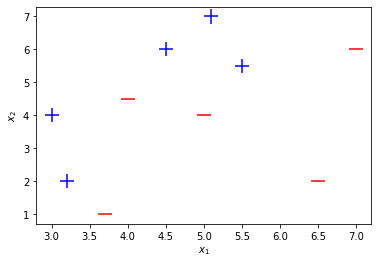

In [3]:
x1 = np.array([3, 3.2, 3.7, 4, 4.5, 5, 5.1, 5.5, 6.5, 7])
x2 = np.array([4, 2, 1, 4.5, 6, 4, 7, 5.5, 2, 6])
y = np.array([1, 1, -1, -1, 1, -1, 1, 1, -1, -1])
D1 = np.ones(10) / 10

plot_samples(x1, x2, y, D1)
plt.savefig('Round1.pdf')

In [4]:
def update_distribution(D, alpha, incorrect_samples):
    next_D = np.ones(len(D))
    for i in range(len(next_D)):
        if i in incorrect_samples:
            next_D[i] = D[i] * np.exp(alpha)
        else:
            next_D[i] = D[i] * np.exp(-alpha)
    print(next_D)
    next_D /= np.sum(next_D)
    return next_D

First round

In [5]:
# h1 = (x1 <= 3.5)
incorrect = [4, 6, 7]
e1 = 0.3
alpha1 = 0.5 * np.log((1 - e1) / e1)
alpha1

0.42364893019360184

In [6]:
D2 = update_distribution(D1, alpha1, incorrect)
D2

[0.06546537 0.06546537 0.06546537 0.06546537 0.15275252 0.06546537
 0.15275252 0.15275252 0.06546537 0.06546537]


array([0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.16666667,
       0.07142857, 0.16666667, 0.16666667, 0.07142857, 0.07142857])

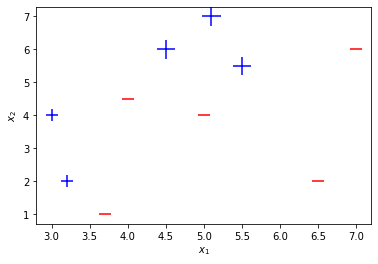

In [7]:
plot_samples(x1, x2, y, D2)
plt.savefig('Round2.pdf')

Second round

In [8]:
# h2 = (x1 >= 6)
incorrect = [2, 3, 5]
e2 = np.sum(D2[incorrect])
e2

0.21428571428571427

In [9]:
alpha2 = 0.5 * np.log((1 - e2) / e2)
alpha2

0.6496414920651304

In [10]:
D3 = update_distribution(D2, alpha2, incorrect)
D3

[0.03730235 0.03730235 0.1367753  0.1367753  0.08703883 0.1367753
 0.08703883 0.08703883 0.03730235 0.03730235]


array([0.04545455, 0.04545455, 0.16666667, 0.16666667, 0.10606061,
       0.16666667, 0.10606061, 0.10606061, 0.04545455, 0.04545455])

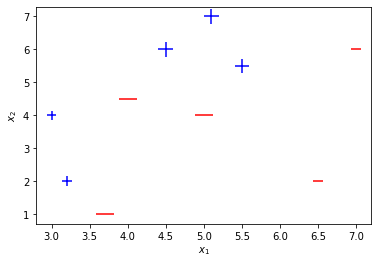

In [11]:
plot_samples(x1, x2, y, D3)
plt.savefig('Round3.pdf')

Third round

In [12]:
# h3 = (x2 >= 5)
incorrect = [0, 1, 9]
e3 = np.sum(D3[incorrect])
e3

0.13636363636363635

In [13]:
alpha3 = 0.5 * np.log((1 - e3) / e3)
alpha3

0.9229133452491655

In [14]:
alpha1 + alpha2 - alpha3

0.15037707700956682

In [15]:
-alpha1 + alpha2 - alpha3

-0.6969207833776369

In [16]:
-alpha1 + alpha2 + alpha3

1.1489059071206942

In [17]:
-alpha1 - alpha2 - alpha3

-1.9962037675078976

In [18]:
-alpha1 - alpha2 + alpha3

-0.15037707700956682